## ECGR 4105 - HomeWork 0 - Problem # 2

The goal of this Problem # 1 is to develop a code to run Linear Regression with Gradient Descent Algorithm. One single training will be performed with all of the 3 explanatory variables (X1, X2, & X3). 

In [144]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
# Importing Data File (D3.csv) as df (DataFrame)
df = pd.read_csv("D3.csv")

In [146]:
# First 3 Columns are independent variables x1, x2, and x3. 4th Column is the dependent variable y
df.head(10)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
5,0.202020,2.914747,2.682424,3.815420
6,0.242424,3.609697,3.130909,4.091200
7,0.282828,0.304646,3.579394,2.363715
8,0.323232,0.999596,0.027879,3.832965
9,0.363636,1.694545,0.476364,4.098950


In [147]:
len(df)

100

In [148]:
# Getting 1st Explanatory Independent Variables X1, X2, & X3
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]

# Getting Dependent Variable Y
Y = df.values[:,3]
len(X1), len(X2), len(X3), len(Y)

(100, 100, 100, 100)

In [153]:
# Showing only first 5 records for X1, X2, X3 and y
print("X1 = ", X1[: 5])
print("X2 = ", X2[: 5])
print("X3 = ", X3[: 5])
print("Y = ", Y[: 5]) 

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


In [154]:
# Conversion of X (1D Array) to 2D array using the reshape function
m = len(X1)
X_of_1 = X1.reshape(m,1)
X_of_2 = X2.reshape(m,1)
X_of_3 = X3.reshape(m,1)

print("X_of_1 = ", X_of_1[:10])
print("X_of_2 = ", X_of_2[:10])
print("X_of_3 = ", X_of_3[:10])

X_of_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]]
X_of_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]
 [2.91474747]
 [3.60969697]
 [0.30464646]
 [0.99959596]
 [1.69454546]]
X_of_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]
 [2.68242424]
 [3.13090909]
 [3.57939394]
 [0.02787879]
 [0.47636364]]


In [155]:
# Creation of a matrix with a single column of '1s'
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 100)

In [156]:
# Stack X_of_0, X_of_1, X_of_2, and X_of_3  horizontally using the hstack function
X = np.hstack((X_0, X_of_1, X_of_2, X_of_3))

print(X[:5])

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]


In [157]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [158]:
def compute_loss(X,Y,theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * np.sum(sqrErrors)
    
    return J

In [159]:
# Computation of the loss for theta values
loss = compute_loss(X,Y,theta)


print("The loss = ", loss)

The loss =  5.524438459196242


In [160]:
def gradient_descent(X,Y,theta,alpha,iterations):
   loss_history = np.zeros(iterations)

   for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions,Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X,Y,theta)
        
   return theta, loss_history

In [161]:
theta = [0., 0., 0., 0.]
iterations = 2000
alpha = 0.05

In [162]:
theta, loss_history = gradient_descent(X,Y,theta, alpha, iterations)

print("Final value of theta = ", theta);
print("loss_history = ", loss_history);

Final value of theta =  [ 5.31392989 -2.00368575  0.53260255 -0.26556708]
loss_history =  [4.35632837 3.99754934 3.73994659 ... 0.73846424 0.73846424 0.73846424]


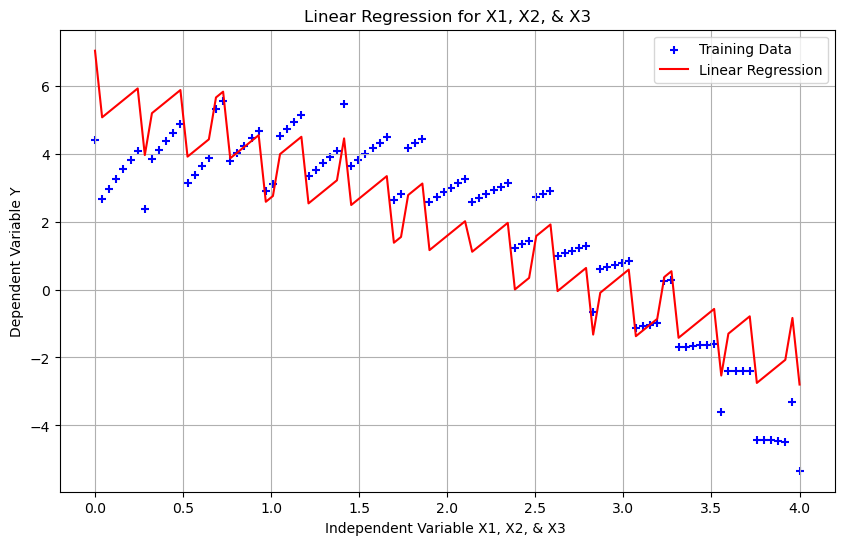

In [163]:
plt.scatter(X[:,1], Y, color = "blue", marker = "+", label = "Training Data")
plt.plot(X[:,1],X.dot(theta), color = "red", label = "Linear Regression" )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Independent Variable X1, X2, & X3 ");
plt.ylabel("Dependent Variable Y");
plt.title("Linear Regression for X1, X2, & X3");
plt.legend();

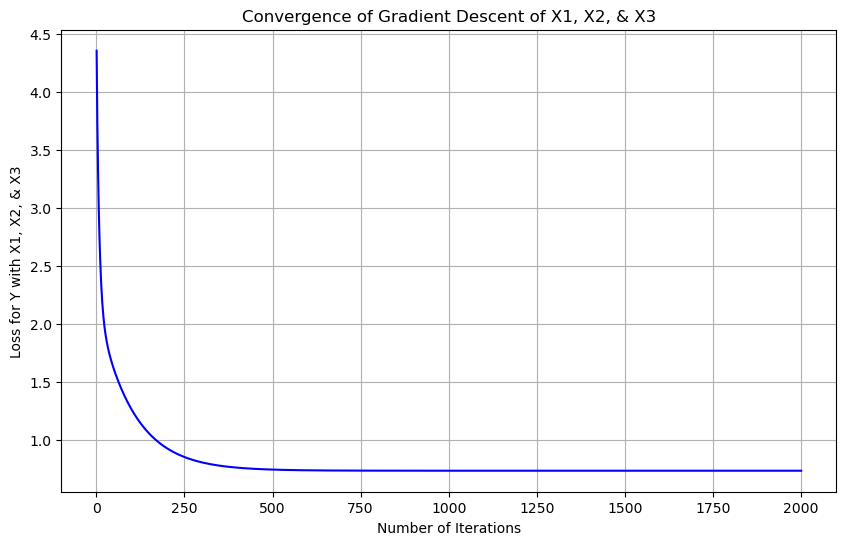

In [164]:
plt.plot(range(1, iterations + 1), loss_history, color = "blue")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations");
plt.ylabel("Loss for Y with X1, X2, & X3");
plt.title("Convergence of Gradient Descent of X1, X2, & X3");

In [165]:
prediction = theta[0] + 1*theta[1] + 1*theta[2] + 1*theta[3]
prediction

3.5772796020480597

In [166]:
prediction = theta[0] + 2*theta[1] + 0*theta[2] + 4*theta[3]
prediction

0.24429005364325773

In [167]:
prediction = theta[0] + 3*theta[1] + 2*theta[2] + 1*theta[3]
prediction

0.10251065033649731